In [1]:
import numpy as np
from ctapipe.io import event_source
from ctapipe.io import EventSeeker
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 20


In [20]:
def format_axes(ax):
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(
    axis='x',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    ax.tick_params(
    axis='y',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
    
    return ax

In [25]:
source = event_source(input_url="../data/real_data/LST-1.1.Run01627.0001.fits.fz",
                      max_events=100)
subarray = source.subarray

Event None, Max: 2167.0 counts


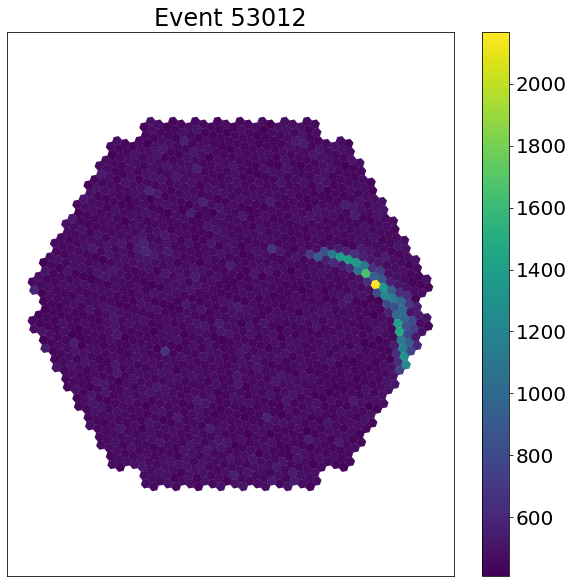

Event None, Max: 2454.0 counts


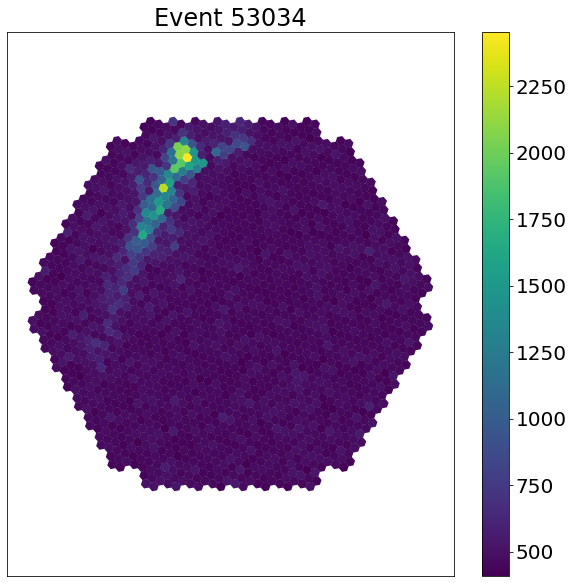

Event None, Max: 1917.0 counts


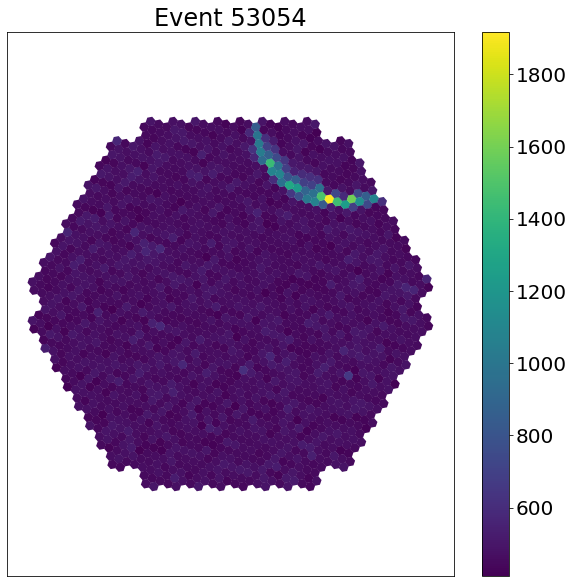

Event None, Max: 2016.0 counts


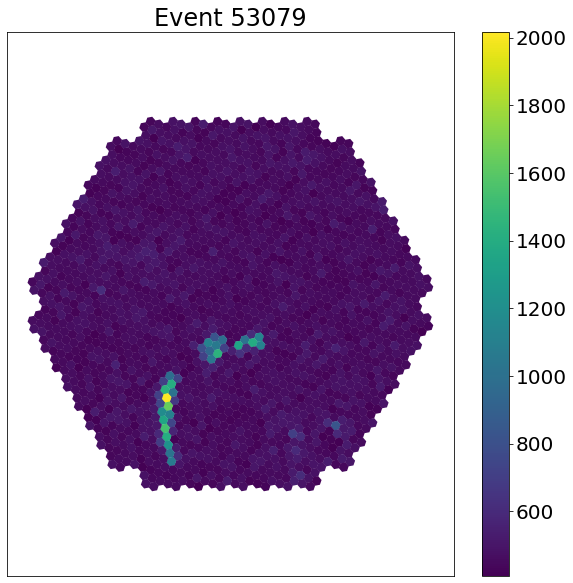

Event None, Max: 1798.0 counts


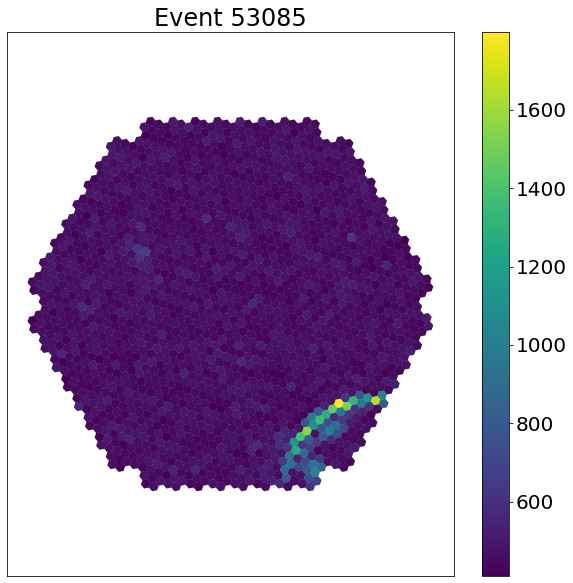

In [26]:
tel_id = 1
geom = subarray.tels[tel_id].camera.geometry

for i, ev in enumerate(source):
    N_modules = 7 * 265

    std_signal = np.zeros(1855)
    for pixel in range(0, N_modules):
        std_signal[pixel] = np.max(ev.r0.tel[tel_id].waveform[0, pixel, 2:38])

    if((np.size(std_signal[std_signal>1000.]) < 15) or (np.size(std_signal[std_signal>1000.]) > 1800)):
        continue  
    print(f"Event {ev.lst.tel[0].evt.event_id}, Max: {np.max(std_signal)} counts")


    fig, ax = plt.subplots(figsize=(10,10))
    disp0 = CameraDisplay(subarray.tels[tel_id].camera.geometry, ax=ax)
    disp0.cmap = 'viridis'
    disp0.image = std_signal
    disp0.add_colorbar(ax=ax)

    # Establish max and min
    sort = np.argsort(std_signal)
    min_color = std_signal[sort][7] # There was one cluster off
    max_color = std_signal[sort][-2]
    max_color = np.max(std_signal)

    disp0.set_limits_minmax(min_color, max_color)
    ax.set_title(f"Event {ev.lst.tel[tel_id].evt.event_id}")
    format_axes(ax)
#     fig.savefig("Images_LST/Event_%i.png"%(ev.lst.tel[0].evt.event_id))

    plt.show()

cell 1


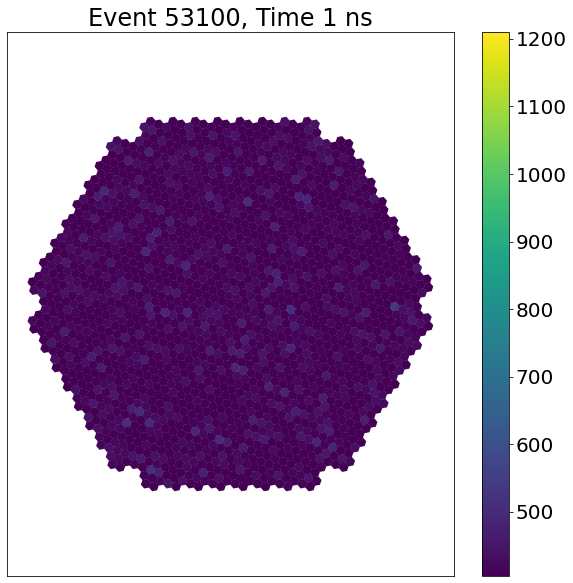

cell 2


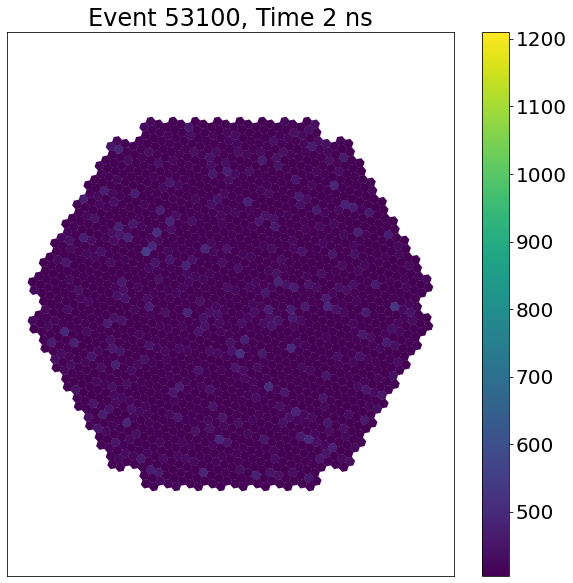

cell 3


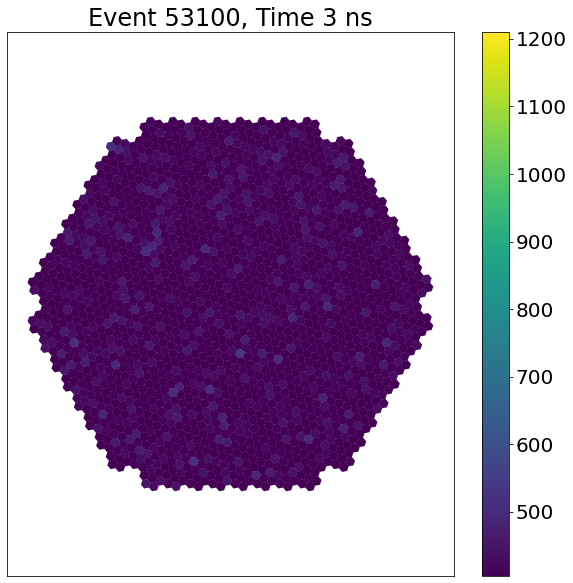

cell 4


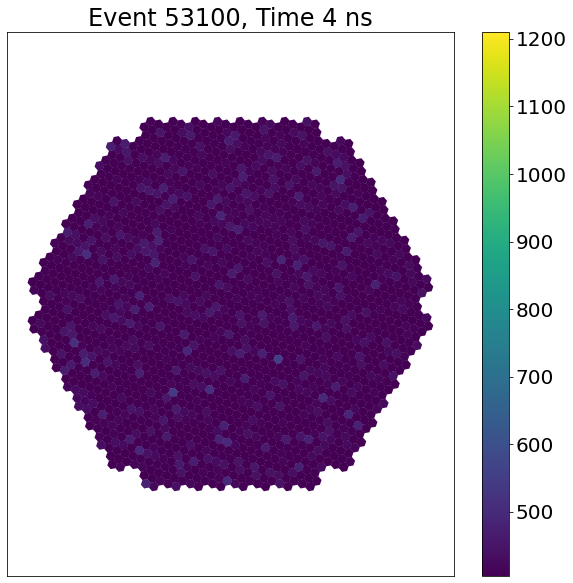

cell 5


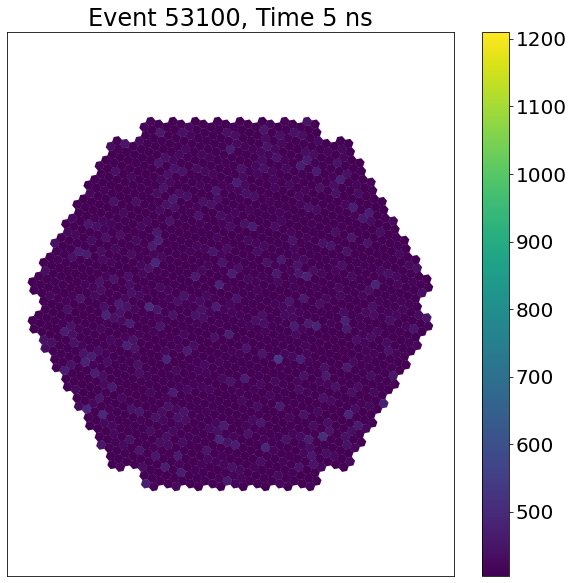

cell 6


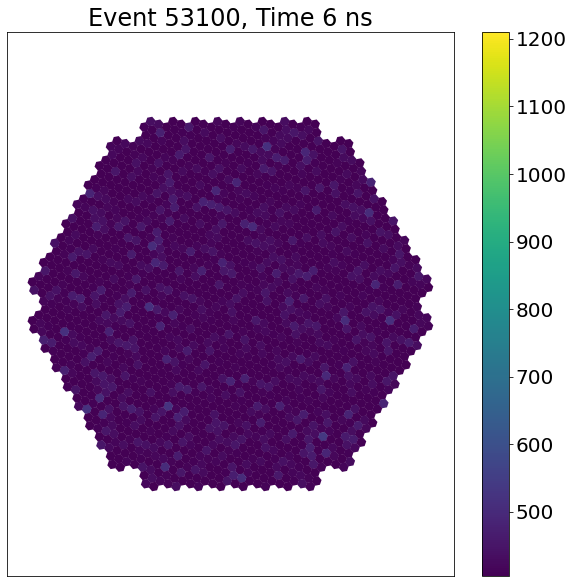

cell 7


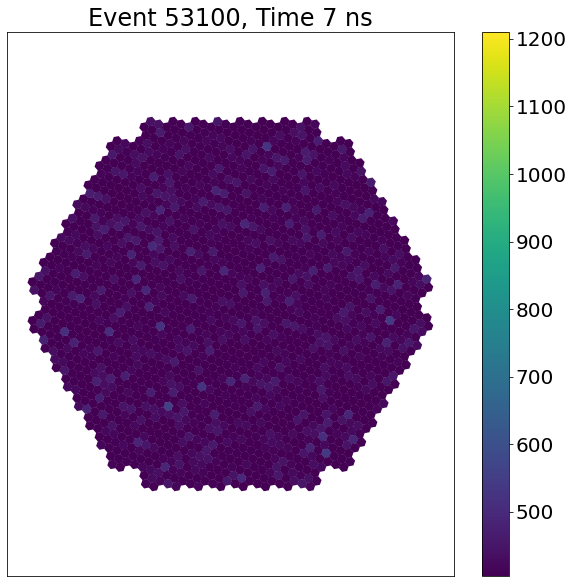

cell 8


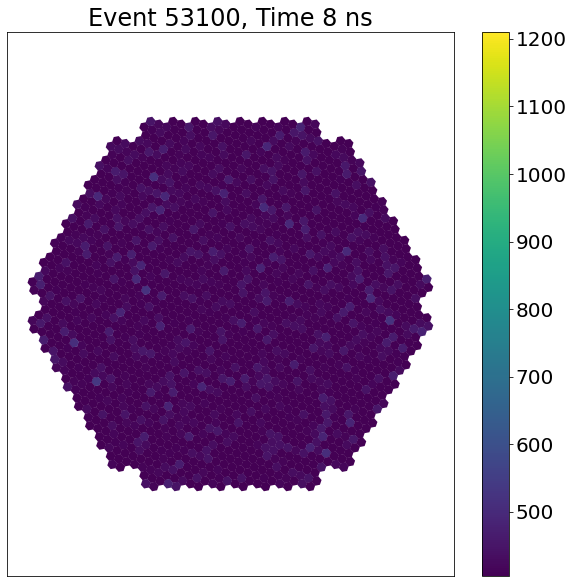

cell 9


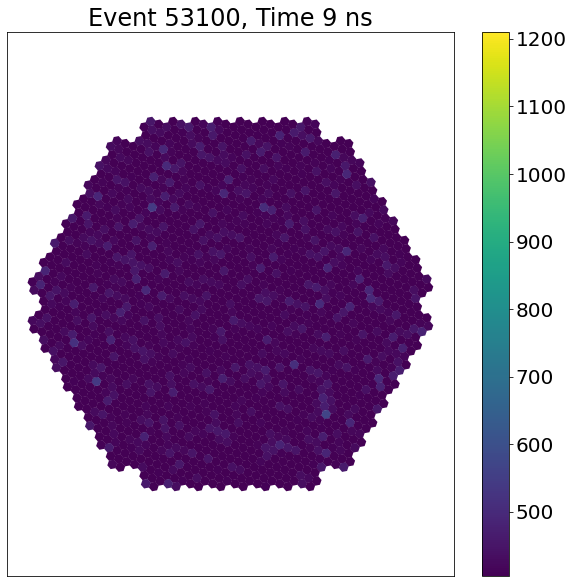

cell 10


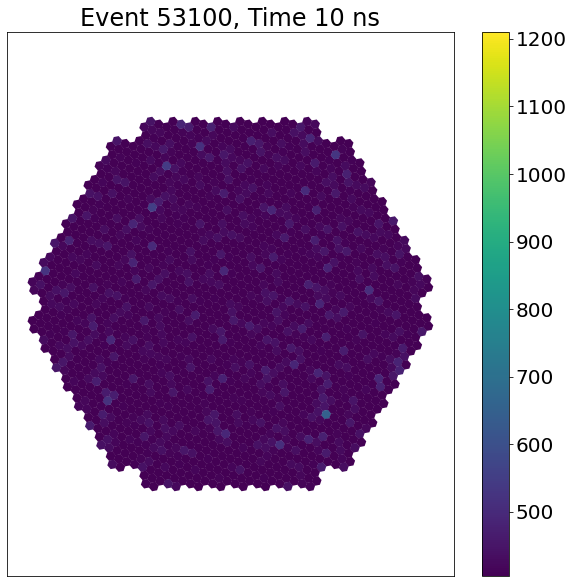

cell 11


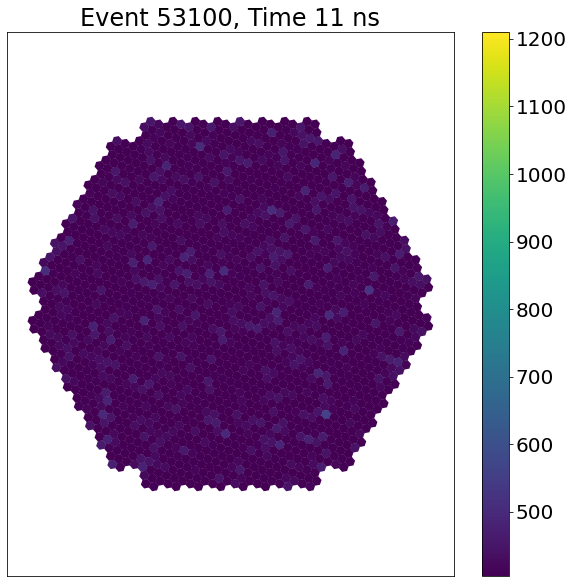

cell 12


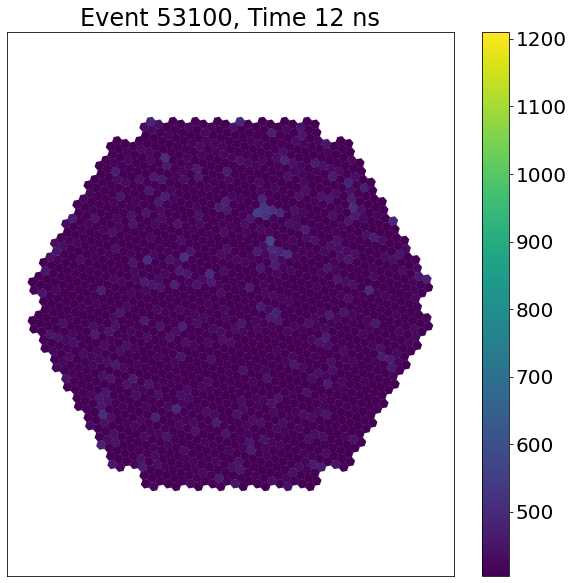

cell 13


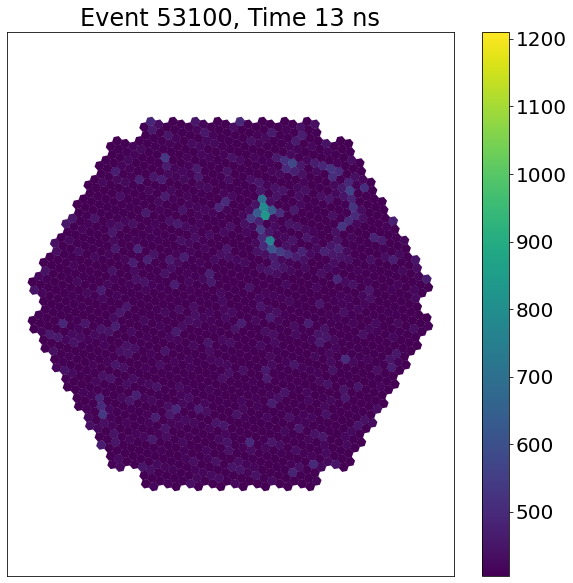

cell 14


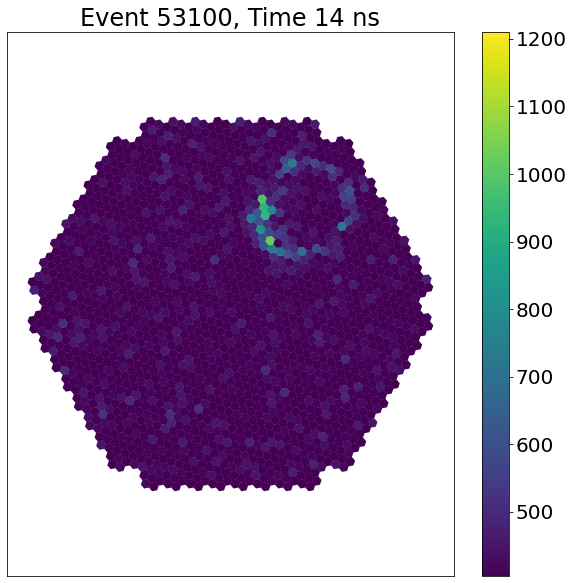

cell 15


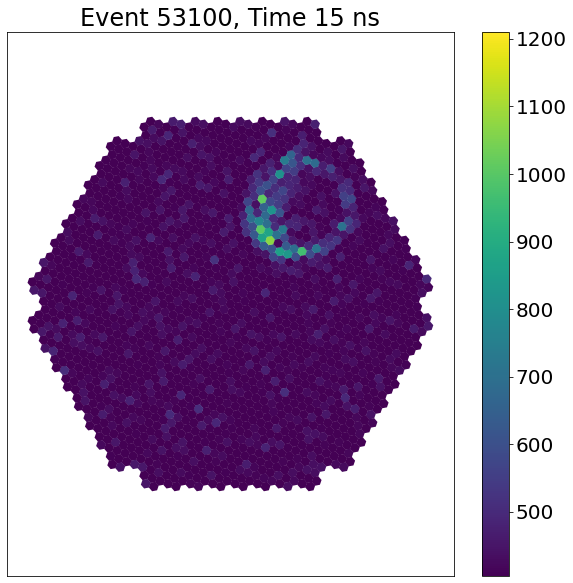

cell 16


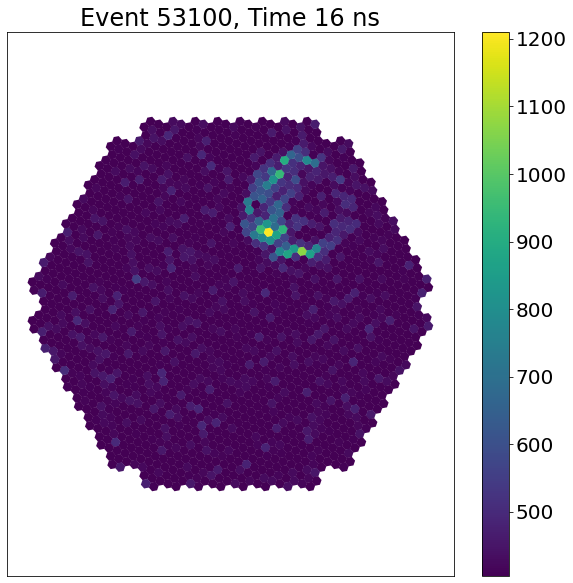

cell 17


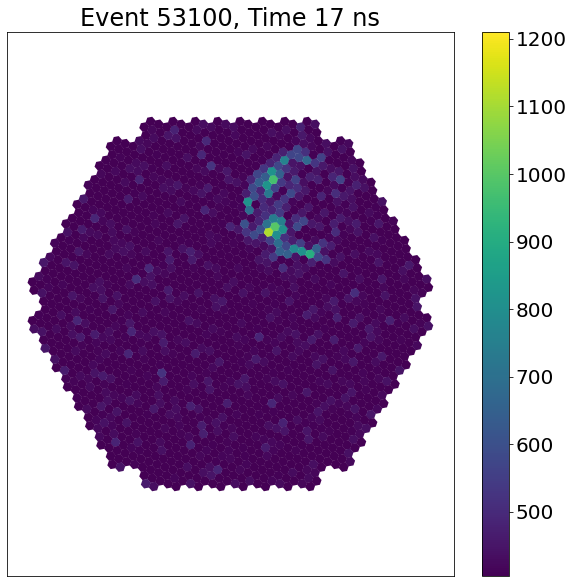

cell 18


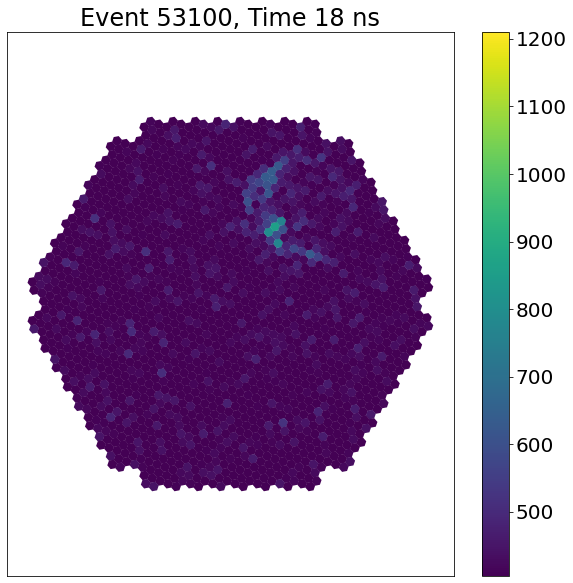

cell 19


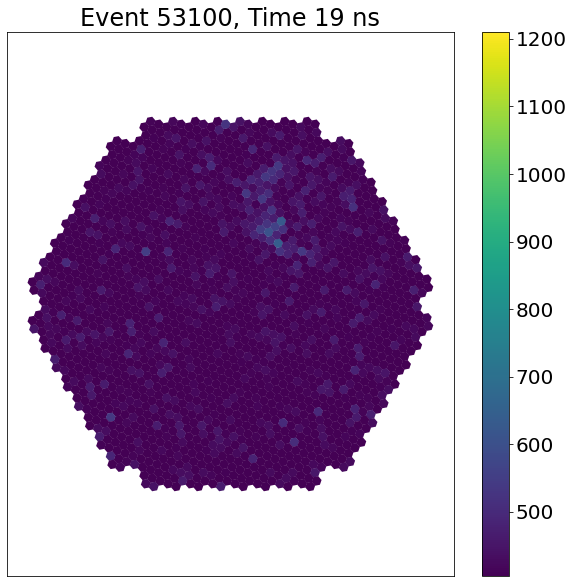

cell 20


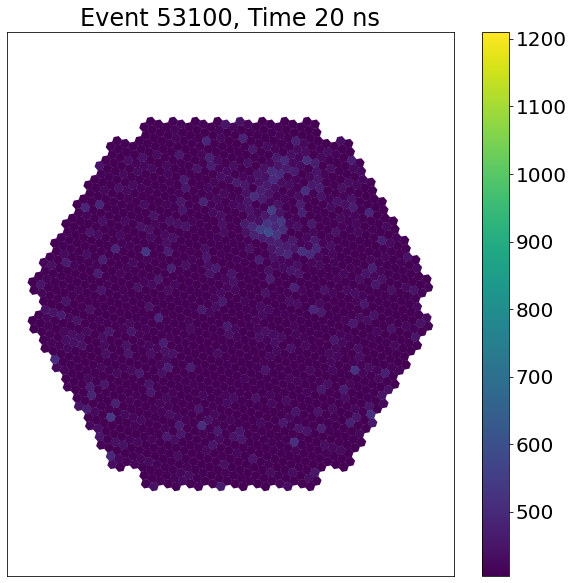

cell 21


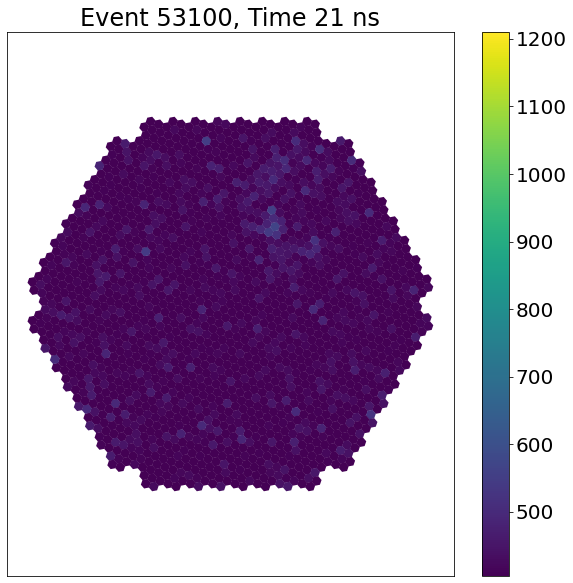

cell 22


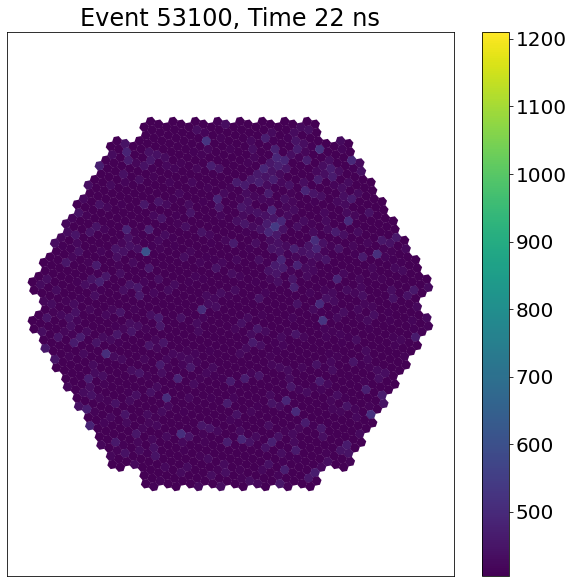

cell 23


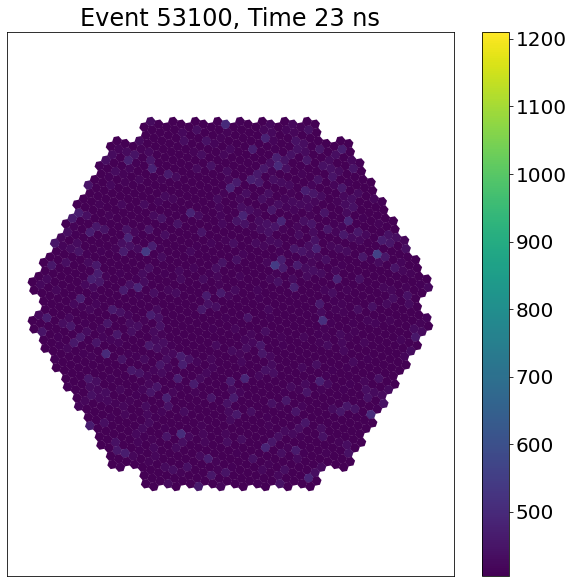

cell 24


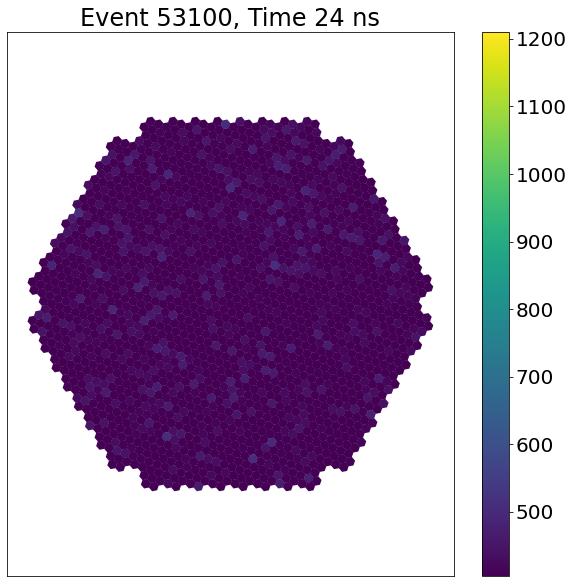

cell 25


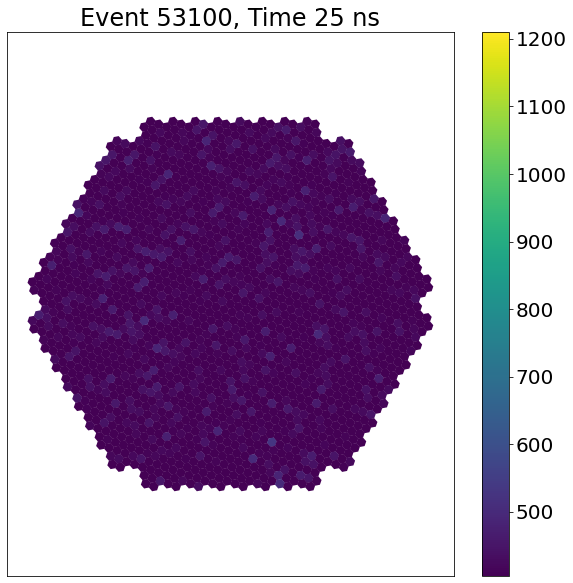

cell 26


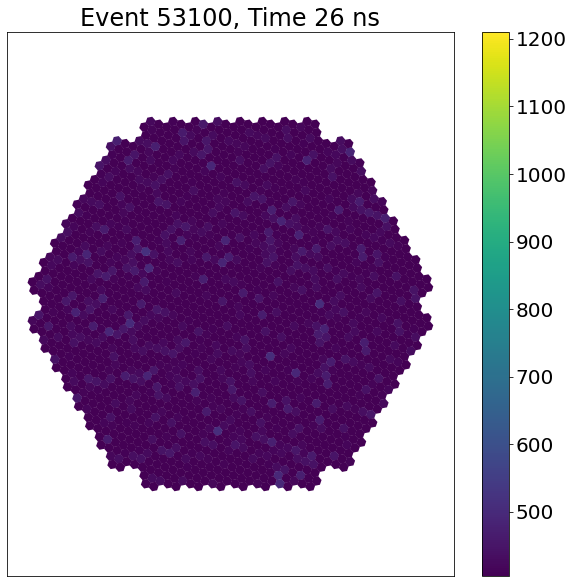

cell 27


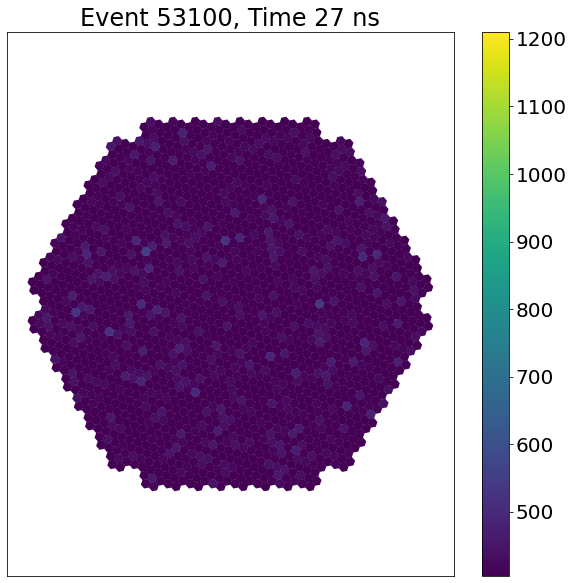

cell 28


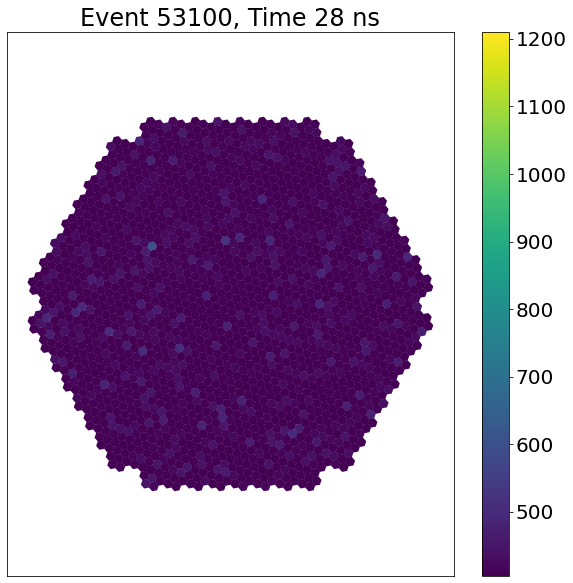

cell 29


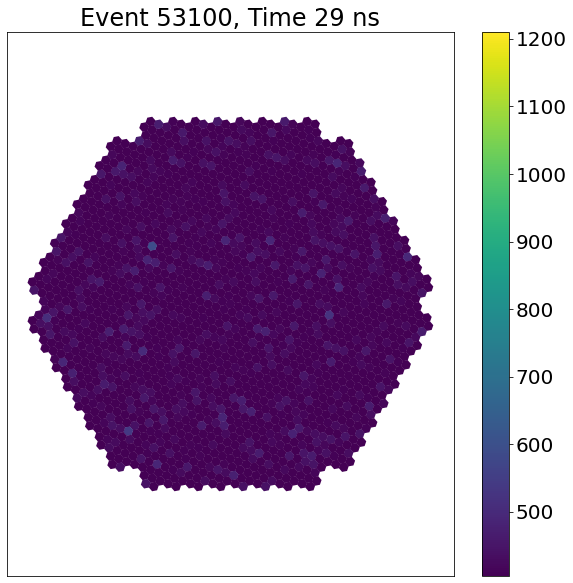

cell 30


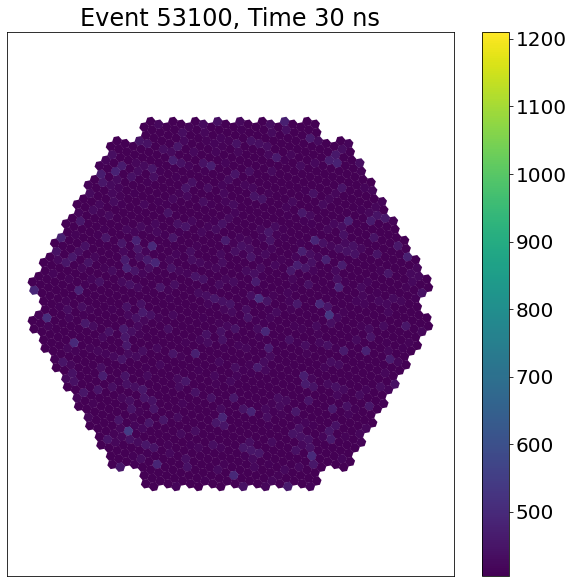

cell 31


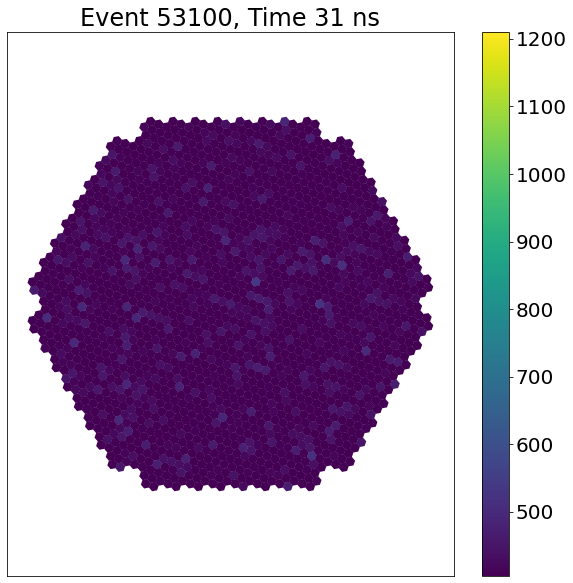

cell 32


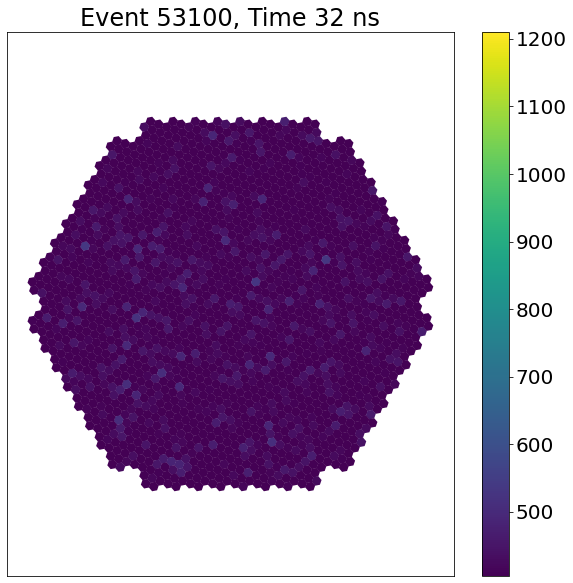

cell 33


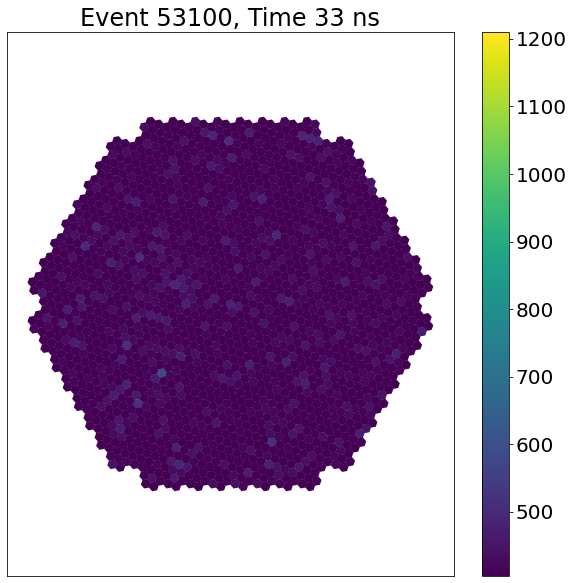

cell 34


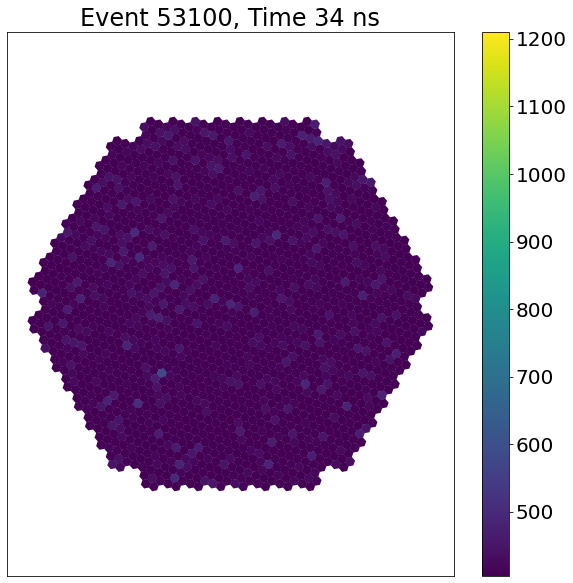

cell 35


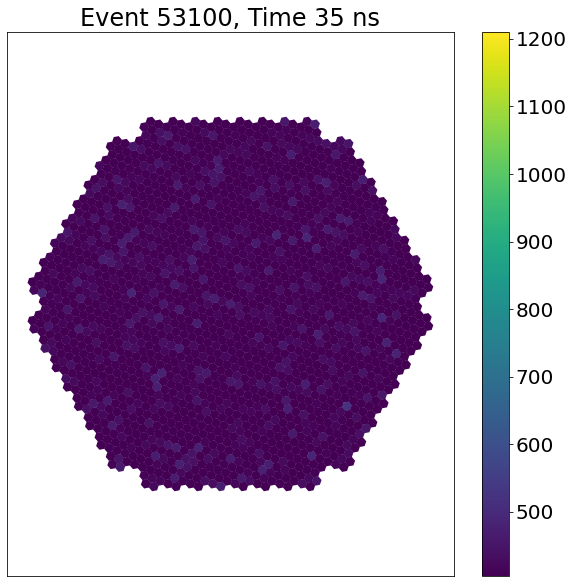

cell 36


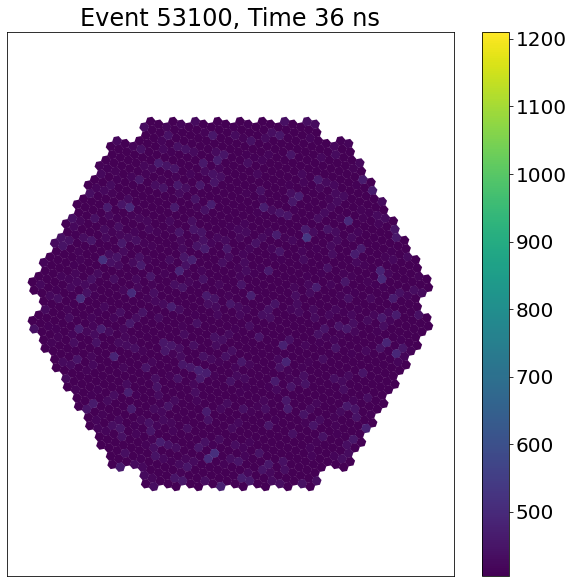

cell 37


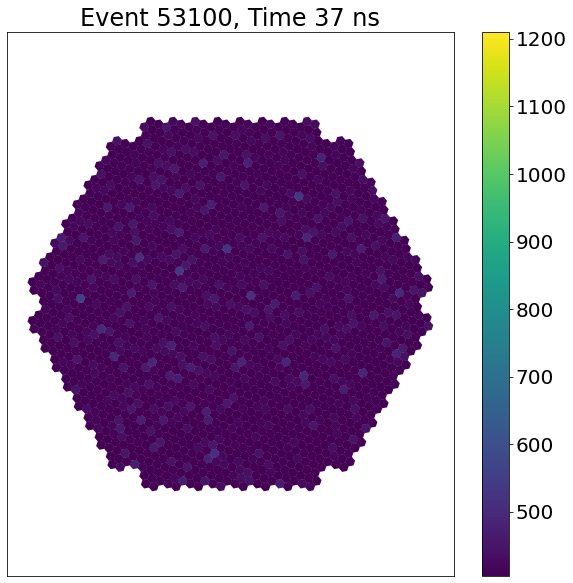

cell 38


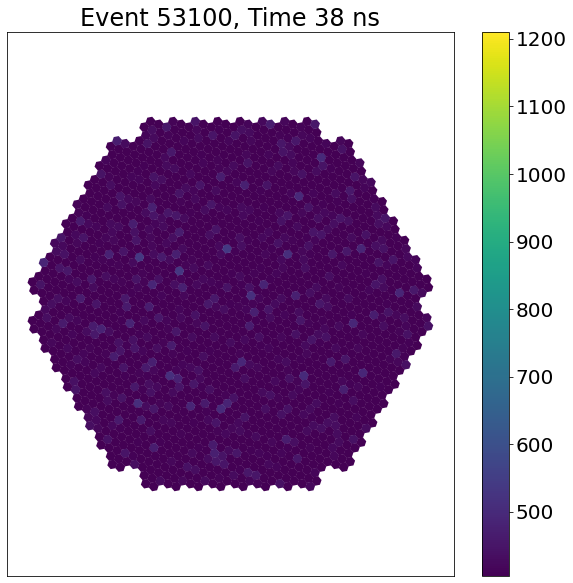

In [30]:
# If you want to make a movie with all the slices

max_color = np.max(std_signal)
sort = np.argsort(std_signal)
min_color = std_signal[sort][7]

for cell in range(1,39):
    print("cell",cell)
    fig, ax = plt.subplots(figsize=(10,10))
    disp0 = CameraDisplay(geom, ax=ax)
    disp0.cmap = 'viridis'
    disp0.add_colorbar(ax=ax)
    disp0.image = ev.r0.tel[tel_id].waveform[0,:,cell]
    disp0.set_limits_minmax(min_color, max_color)
    format_axes(ax)
    ax.set_title(f"Event {ev.lst.tel[tel_id].evt.event_id}, Time {cell} ns")
    fig.savefig("image_test/Event_{:02d}_cell{:02d}.png".format(ev.lst.tel[tel_id].evt.event_id,cell))
    #plt.show()

In [35]:
!convert image_test/'Event_{ev.lst.tel[tel_id].evt.event_id}*png' image_test/'Event_{ev.lst.tel[tel_id].evt.event_id}.gif'